**QR Decomposition of Orthogonal, Scaled, and Broken Matrices**

In [15]:
import numpy as np

threshold = 1e-10

np.random.seed(42)
matrix = np.random.randn(6, 6)
Q, _ = np.linalg.qr(matrix)
orthogonal_matrix = Q

Q, R = np.linalg.qr(orthogonal_matrix)
R[np.abs(R) < threshold] = 0
Q_T_Q = np.dot(Q.T, Q)
Q_T_Q[np.abs(Q_T_Q) < threshold] = 0
print("Step 1: Decomposition of orthogonal matrix")
print("R:")
print(R)
print("Q^T Q:")
print(Q_T_Q)
print("-" * 50)

norms = np.arange(10, 16)
modified_matrix = orthogonal_matrix * norms
Q, R = np.linalg.qr(modified_matrix)
R[np.abs(R) < threshold] = 0
Q_T_Q = np.dot(Q.T, Q)
Q_T_Q[np.abs(Q_T_Q) < threshold] = 0
print("Step 2: Decomposition of scaled matrix")
print("R:")
print(R)
print("Diagonal values of R:", np.diag(R))
print("Q^T Q:")
print(Q_T_Q)
print("-" * 50)

broken_matrix = modified_matrix.copy()
broken_matrix[0, 3] = 0
Q, R = np.linalg.qr(broken_matrix)
R[np.abs(R) < threshold] = 0
Q_T_Q = np.dot(Q.T, Q)
Q_T_Q[np.abs(Q_T_Q) < threshold] = 0
print("Step 3: Decomposition of broken matrix")
print("R:")
print(R)
print("Q^T Q:")
print(Q_T_Q)
print("-" * 50)


Step 1: Decomposition of orthogonal matrix
R:
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
Q^T Q:
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
--------------------------------------------------
Step 2: Decomposition of scaled matrix
R:
[[10.  0.  0.  0.  0.  0.]
 [ 0. 11.  0.  0.  0.  0.]
 [ 0.  0. 12.  0.  0.  0.]
 [ 0.  0.  0. 13.  0.  0.]
 [ 0.  0.  0.  0. 14.  0.]
 [ 0.  0.  0.  0.  0. 15.]]
Diagonal values of R: [10. 11. 12. 13. 14. 15.]
Q^T Q:
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
--------------------------------------------------
Step 3: Decomposition of broken matrix
R:
[[10.          0.          0.          1.96745568  0.          0.        ]
 [ 0.         11.          0.         -0.60873227  0.          0.        ]
 [ 0.       

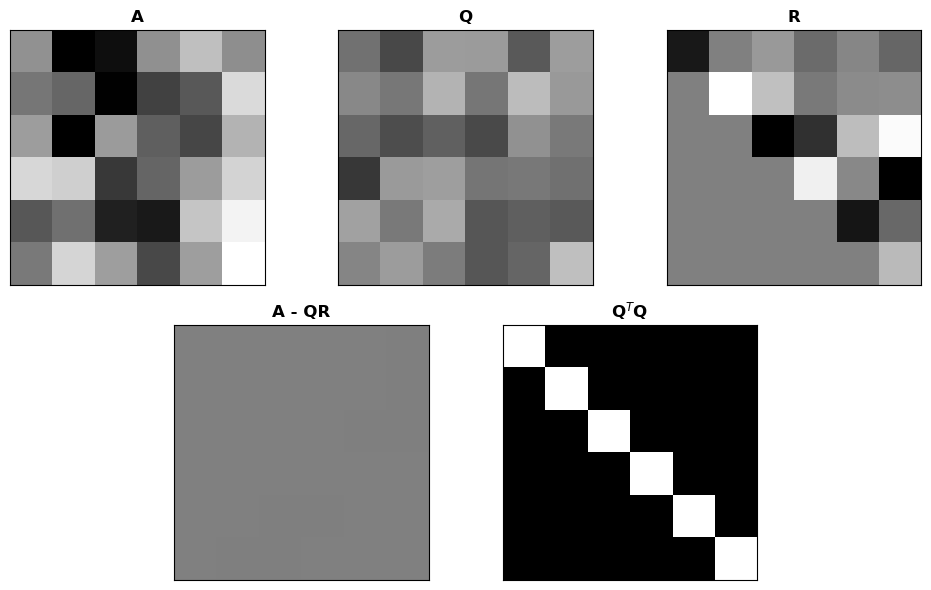

In [16]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

# create a random matrix
A = np.random.randn(6,6)

# QR decomposition
Q,R = np.linalg.qr(A)

# show the matrices
fig = plt.figure(figsize=(10,6))
axs = [0]*5
c = 1.5 # color limits

gs1 = gridspec.GridSpec(2,6)
axs[0] = plt.subplot(gs1[0,:2])
axs[0].imshow(A,vmin=-c,vmax=c,cmap='gray')
axs[0].set_title('A',fontweight='bold')

axs[1] = plt.subplot(gs1[0,2:4])
axs[1].imshow(Q,vmin=-c,vmax=c,cmap='gray')
axs[1].set_title('Q',fontweight='bold')

axs[2] = plt.subplot(gs1[0,4:6])
axs[2].imshow(R,vmin=-c,vmax=c,cmap='gray')
axs[2].set_title('R',fontweight='bold')

axs[3] = plt.subplot(gs1[1,1:3])
axs[3].imshow(A - Q@R,vmin=-c,vmax=c,cmap='gray')
axs[3].set_title('A - QR',fontweight='bold')

axs[4] = plt.subplot(gs1[1,3:5])
axs[4].imshow(Q.T@Q,cmap='gray')
axs[4].set_title(r'Q$^T$Q',fontweight='bold')

# remove ticks from all axes
for a in axs:
  a.set_xticks([])
  a.set_yticks([])

plt.tight_layout()
plt.savefig('Figure_09_01.png',dpi=300)
plt.show()

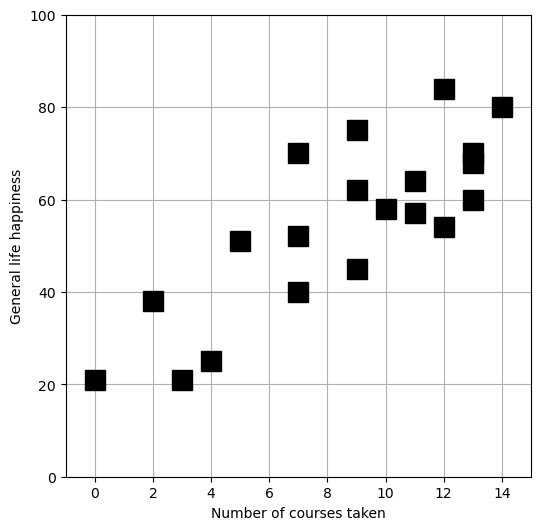

(20, 1)


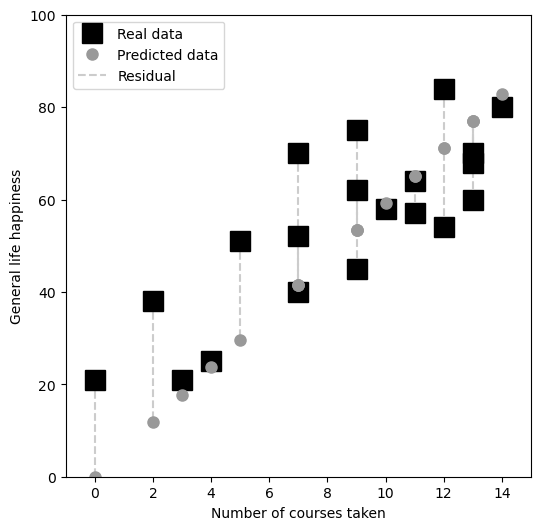

In [17]:
import matplotlib.pyplot as plt

numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

plt.figure(figsize=(6,6))

plt.plot(numcourses,happiness,'ks',markersize=15)
plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.grid()
plt.xticks(range(0,15,2))
plt.savefig('Figure_11_03.png',dpi=300)
plt.show()
# Build a statistical model

# design matrix as a column vector
X = np.array(numcourses,ndmin=2).T
print(X.shape)

# fit the model using the left-inverse
X_leftinv = np.linalg.inv(X.T@X) @ X.T

# solve for the coefficients
beta = X_leftinv @ happiness
beta
# let's plot it!

# predicted data
pred_happiness = X@beta

plt.figure(figsize=(6,6))

# plot the data and predicted values
plt.plot(numcourses,happiness,'ks',markersize=15)
plt.plot(numcourses,pred_happiness,'o',color=[.6,.6,.6],linewidth=3,markersize=8)

# plot the residuals (errors)
for n,y,yHat in zip(numcourses,happiness,pred_happiness):
  plt.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.xticks(range(0,15,2))
plt.legend(['Real data','Predicted data','Residual'])

**Linear Regression Using Left-Inverse and QR Decomposition**

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# null space
from scipy.linalg import null_space

import sympy as sym
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

# recreate the design matrix and solution via left-inverse
X = np.hstack((np.ones((20,1)),np.array(numcourses, ndmin=2).T))
y = np.array(happiness, ndmin=2).T

# Left-inverse method
beta1 = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# QR decomposition
Q, R = np.linalg.qr(X)

beta2 = np.dot(np.linalg.inv(R), np.dot(Q.T, y))

print('Betas from left-inverse: ')
print(np.round(beta1, 3))
print(' ')
print('Betas from QR with inv(R): ')
print(np.round(beta2, 3))
print(' ')


Betas from left-inverse: 
[[23.13 ]
 [ 3.698]]
 
Betas from QR with inv(R): 
[[23.13 ]
 [ 3.698]]
 
